# Le pendule

**Modélisation Numérique en Physique - S2**

**Miniprojet 5**

**ARGUELLO Camilo**

## Tableau

1. Introduction
2. Approximation des petits angles
3. Force d'excitation
4. Mouvement chaotique
5. Conclusion

## Introduction

Le pendule simple est un exemple classique de mouvement harmonique, il est composé d'un objet et une corde (avec masse négligeable). Dans le vide, le pendule simple peut osciller indéfiniment car il n'y a pas de résistance à l'air, avec une amplitude constante. Cependant, on se place dans le cas d'un pendule simple amorti où l'amplitude des oscillations se perd progressivement. 

Si on considère l'objet avec un masse $m$, et la corde de longueur $L$, on peut trouver la variation de l'angle $\theta$ (angle par rapport à la verticale). L'équation du mouvement peut s'ecrire:

$$ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\sin\theta=0 $$

Dans un contexte des petits angles, va considerer: 
$$ 
sin \theta \approx \theta \quad \Rightarrow \quad\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0
$$

Avec $\Omega=\sqrt{{g/l}}$ comme la pulsation propre et $q$ comme le terme de frottement. L'objectif de cette projet est d'étudier expérimentalement les oscillations avec et sans forces d'excitation du mouvement.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Approximation des petits angles

Lorsqu'on va considèrer une approximation des petits angles avec un terme de frottement, c'est-à-dire pour 
$$
\quad\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0
$$
On peut résoudre le système d'équations de la façon suivante. Si on utilise $u_0 = \theta$ et $u_1=\frac{d\theta}{dt}$ on aurait:

$$
\frac{du_0}{dt} = u_1 
$$
et 
$$
\frac{du_1}{dt} = -q u_1 - \Omega^2 u_0 
$$


In [3]:
# Paramètre
L = 1 # Longueur (m)
g = 9.81 # Pesanteur (m.s^-2)
omega = np.sqrt(g / L)  # Pulsation (notée k dans l'énoncé)
Tp = 2 * np.pi / omega # Période (s)

In [4]:
# EDO
def derivee_u (u, t, q=1, Fe=1):
    '''
        Soit u = (u0, u1)
        Équation d'évolution du pendule : d(u0, u1)/dt = (u1, -q * u1 -omega ** 2 * u0)
    '''
    # Initialisation de la dérivée
    du = np.empty(u.shape)
    
    # Dérivée de la vitesse
    du[0] = u[1]
    du[1] =  -(q * u[1]) - ((omega ** 2) * u[0])

    return du

In [5]:
def rk4(start, end, step, v_ini, derivee, ordre, q=1, Fe=1):
    '''
        Application de la méthode rk4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:, i], t[i], q, Fe)
        d2 = derivee(v[:, i] + step / 2 * d1, t[i] + step / 2, q, Fe)
        d3 = derivee(v[:, i] + step / 2 * d2, t[i] + step / 2, q, Fe)
        d4 = derivee(v[:, i] + step * d3, t[i] + step, q, Fe)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    # Argument de sortie
    return t, v


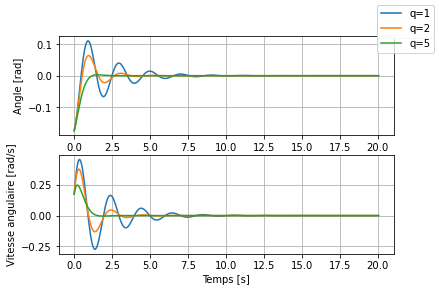

In [6]:

fig, (ax,ax2) = plt.subplots(2,1)

qs = [1, 2, 5] # valeurs q

# Entre 10° (en rads)
u_ini = np.array([ -np.deg2rad(10) ,  np.deg2rad(10)])

ti = 0 # mn
tf = 10 * Tp
dt = 0.05

for q in qs:
    t, Drk4 = rk4(ti, tf, dt, u_ini, derivee_u, ordre=2, q=q)
    
    ax.plot(t, Drk4[0, :], label='q='+str(q))
    ax2.plot(t, Drk4[1, :])

    ax.set_ylabel('Angle [rad]')
    ax2.set_ylabel('Vitesse angulaire [rad/s]')
    ax2.set_xlabel('Temps [s]')
    ax.grid()
    ax2.grid()
    fig.legend()

Pour différents valeurs de $q$, l'angle faite par le pendule montre un amortissement très forte lorsque $q=5$ (C'est à dire le pendule n'oscille pas beaucoup), alors pour des valeurs de $q$ faibles, le pendule peut osciller avec un perd progressive (plus lent) du mouvement.

## Force d’excitation

Maintenant, on se place dans le cas d'avoir une force d'excitation avec une équation:

$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\theta=F_e\sin(\Omega_e t). $$

Avec, $\Omega_e=\frac{2\Omega}{3}$.

Pour résoudre le système d'équations, on va utiliser la même façon avec $u_0 = \theta$ et $u_1=\frac{d\theta}{dt}$ on aurait:

$$
\frac{du_0}{dt} = u_1 
$$
et 
$$
\frac{du_1}{dt} = -q u_1 - \Omega^2 u_0 + F_e sin(\Omega_e t)
$$


In [7]:
# EDO
def derivee_u (u, t, q = 1, Fe=1):
    '''
        Soit u = (u0, u1)
        Équation d'évolution du pendule : d(u0, u1)/dt = (u1, -q * u1 -omega ** 2 * u0 + Fe * sin(Omega_e * t))
    '''
    # Initialisation de la dérivée
    du = np.empty(u.shape)
    omega_e = (2 * omega) / 3

    # Dérivée de la vitesse
    du[0] = u[1]
    du[1] =  -(q * u[1]) - ((omega ** 2) * u[0]) + (Fe * np.sin(omega_e * t))

    return du

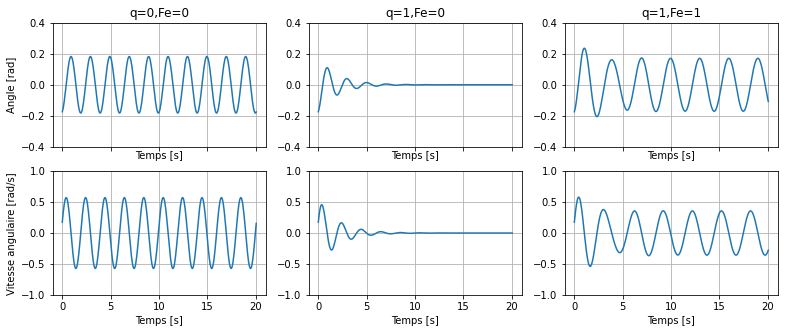

In [8]:
fig, axes = plt.subplots(2,3, sharex=True, figsize=(13, 5))

u_ini = np.array([ -np.deg2rad(10) ,  np.deg2rad(10) ])

ti = 0
tf = 10 * Tp
dt = 0.05

# Cas 1
q=0;Fe=0
t, Drk4 = rk4(ti, tf, dt, u_ini, derivee_u, ordre=2, q=q, Fe=Fe)
axes[0,0].plot(t, Drk4[0, :], label='q='+str(q))
axes[1,0].plot(t, Drk4[1, :])
axes[0,0].set_title('q='+str(q)+',Fe='+str(Fe))

# Cas 2
q=1;Fe=0
t, Drk4 = rk4(ti, tf, dt, u_ini, derivee_u, ordre=2, q=q, Fe=Fe)
axes[0,1].plot(t, Drk4[0, :], label='q='+str(q))
axes[1,1].plot(t, Drk4[1, :])
axes[0,1].set_title('q='+str(q)+',Fe='+str(Fe))

# Cas 3
q=1;Fe=1
t, Drk4 = rk4(ti, tf, dt, u_ini, derivee_u, ordre=2, q=q, Fe=Fe)
axes[0,2].plot(t, Drk4[0, :], label='q='+str(q))
axes[1,2].plot(t, Drk4[1, :])
axes[0,2].set_title('q='+str(q)+',Fe='+str(Fe))

axes[0,0].set_ylabel('Angle [rad]')
axes[1,0].set_ylabel('Vitesse angulaire [rad/s]')

# Normalizing plotting view
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        if i == 0:
            axes[i,j].set_ylim(-.4, .4)
        else:
            axes[i,j].set_ylim(-1, 1)
        axes[i,j].set_xlabel('Temps [s]')
        axes[i,j].grid()
plt.show()

Une force sinusoïdale appliquée au pendule avec de petites oscillations peut générer un impulse, suivie d'une série d'oscillations consécutives. 

On voit les 3 cas possibles

1 - Lorsqu'il n'y a pas d'amortissement (le pendule continue de tourner sans perte d'énergie).

2 - Lorsqu'il y a perte progressive des oscillations dues à l'amortissement $q$, mais sans force extérieure $F_e$. (Pseudo-périodique)

3 - Lorsqu'une force sinusoïdale est appliquée au pendule.

## Mouvement chaotique

Finalement, on peut vérifier si la force exercée sur le pendule peut générer un système chaotique. Pour cela, on ne considère plus le cas des petits oscillations. On aura donc l'équation de la forme :

$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\sin\theta=F_e\sin(\Omega_e t) $$

Et la solution $u_0 = \theta$ et $u_1=\frac{d\theta}{dt}$ on aurait:

$$
\frac{du_0}{dt} = u_1 
$$
et 
$$
\frac{du_1}{dt} = -q u_1 - \Omega^2 sin(u_0) + F_e sin(\Omega_e t)
$$


In [9]:
# EDO
def derivee_u (u, t, q = 1, Fe=1):
    '''
        Soit u = (u0, u1)
        Équation d'évolution du pendule : d(u0, u1)/dt = (u1, -q * u1 -omega ** 2 * sin(u0) + Fe * sin(Omega_e * t))
    '''
    # Initialisation de la dérivée
    du = np.empty(u.shape)
    omega_e = (2 * omega) / 3

    # Dérivée de la vitesse
    du[0] = u[1]
    du[1] =  -(q * u[1]) - ((omega ** 2) * np.sin(u[0])) + (Fe * np.sin(omega_e * t))

    return du

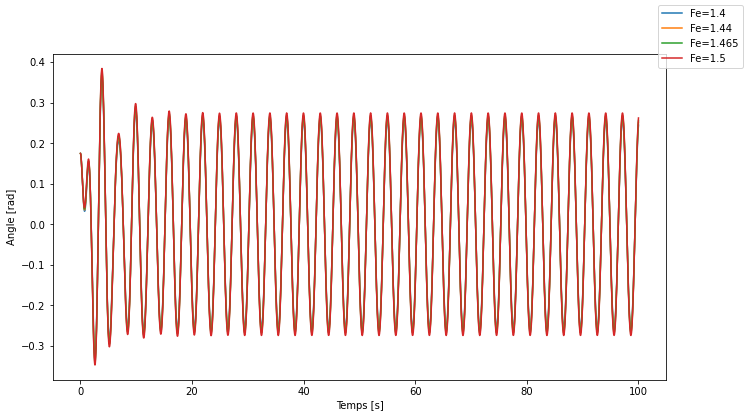

In [10]:
fig, (ax1) = plt.subplots(1,1, figsize=(11,6))
u_ini = np.array([ np.deg2rad(10) , 0.0 ]) # On commence avec des angles entre -PI et PI

ti = 0              # secs
tf = 100            # secs
dt = 0.05           # steps
q = .5              # s^-1

Fes = [1.4, 1.44, 1.465, 1.5] # rad . s^-2

for Fe in Fes:
    t, Drk4 = rk4(ti, tf, dt, u_ini, derivee_u, ordre=2, q=q, Fe=Fe)
    
    # Pour -pi < theta < pi
    angles = np.where((Drk4[0, :] > -np.pi), Drk4[0, :], -np.pi)
    angles = np.where((angles < np.pi), angles, np.pi)

    ax1.plot(t, angles, label='Fe='+str(Fe))
    ax1.set_ylabel('Angle [rad]')
    ax1.set_xlabel('Temps [s]')
fig.legend()
plt.show()

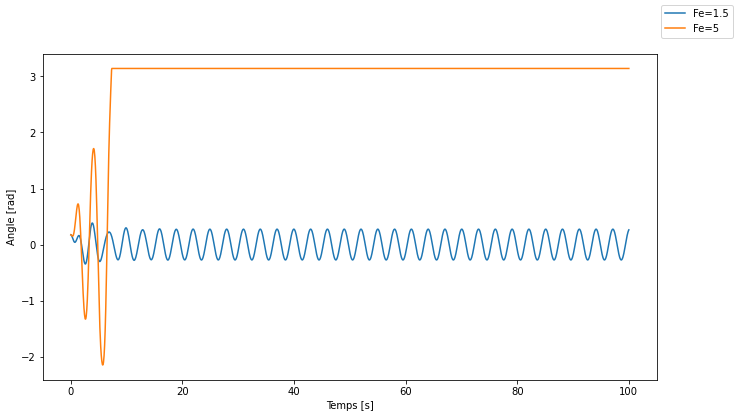

In [16]:
fig, (ax1) = plt.subplots(1,1, figsize=(11,6))
u_ini = np.array([ np.deg2rad(10) , 0.0 ]) # On commence avec des angles entre -PI et PI

ti = 0              # secs
tf = 100            # secs
dt = 0.05           # steps
q = .5              # s^-1

Fes = [1.5,5] # rad . s^-2

for Fe in Fes:
    t, Drk4 = rk4(ti, tf, dt, u_ini, derivee_u, ordre=2, q=q, Fe=Fe)
    
    # Pour -pi < theta < pi
    angles = np.where((Drk4[0, :] > -np.pi), Drk4[0, :], -np.pi)
    angles = np.where((angles < np.pi), angles, np.pi)

    ax1.plot(t, angles, label='Fe='+str(Fe))
    ax1.set_ylabel('Angle [rad]')
    ax1.set_xlabel('Temps [s]')
fig.legend()
plt.show()

Pour les valeurs $F_e = [1.4, 1.44, 1.465, 1.5] \mathrm{~rad\cdot s^{-2}}$, on peut obtenir un système avec une oscillation périodique. Cependant, le système n'arrive pas à devenir chaotique avec ces valeurs. On a essayé avec des valeurs d'amplitude d'excitation supérieures à $Fe=5 \mathrm{~rad\cdot s^{-2}}$, et on peut voir que le pendule perd sa périodicité.

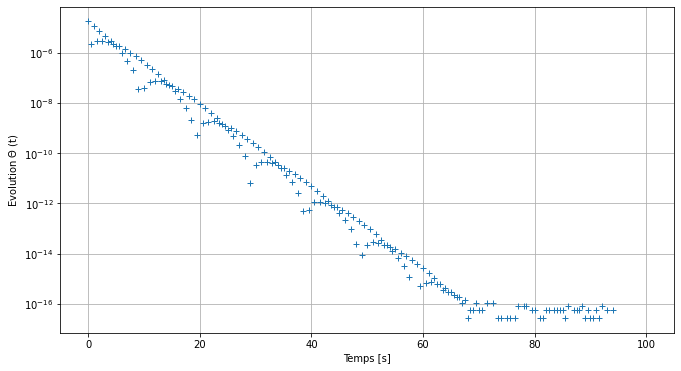

In [150]:
fig, (ax1) = plt.subplots(1,1, figsize=(11,6))

ti = 0
tf = 100
dt = .5
q  = .5 # s^-1
Fe = 1.5

theta=9.999
u_ini = np.array([ np.deg2rad(theta),  0.0 ])
t1, Drk41 = rk4(ti, tf, dt, u_ini, derivee_u, ordre=2, q=q, Fe=Fe)

theta=10.0
u_ini = np.array([ np.deg2rad(theta),  0.0 ])
t2, Drk42 = rk4(ti, tf, dt, u_ini, derivee_u, ordre=2, q=q, Fe=Fe)

diff = np.abs(Drk42[0,:] - Drk41[0,:])
ax1.semilogy(t2, diff, '+')
ax1.set_ylabel('Evolution $\Theta$ (t)')
ax1.set_xlabel('Temps [s]')
plt.grid()
plt.show()

## Conclusion

Dans ce calepin, on a travaillé avec un système d'équations qui expliquent le mouvement d'un pendule selon des conditions initiales des angles et vitesse. On a essayé avec un milieu sans amortissement ni forces externes, ainsi on a vérifié l'effet de l'amortissement sur le mouvement du pendule. Enfin nous vérifions qu'une force sinusoïdale externe génère une série d'oscillations dans le pendule. Pour vérifier si le mouvement du pendule peut devenir chaotique, on a testé avec différentes valeurs d'amplitude d'excitation $Fe$, en vérifiant qu'il peut devenir chaotique après des valeurs supérieures à $Fe=5 \mathrm{~rad\cdot s^{-2}}$.